# ***Customer Personality Analysis***
*   Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.


*   Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

# ***Target***



*   Need to perform clustering to summarize customer segments.

# ***1) Import all necessary libraries***

In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn import metrics
import warnings


In [3]:
#Import Dataset
df = pd.read_csv("https://raw.githubusercontent.com/Aman240499/DS-Python-Progamming/main/marketing_campaign%20.csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## ***2) EDA***

Data cleaning

Feature engineering

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From above we conclude that,

1) Income column has 24 missing value.

2) dt_customer is the date of customer joined but datatype of this column is not datetime.

3) There are 2 columns in our data set which are categoriocal & we need to convert it into int.

4) Some data types which are int having object datatype

# ***Droping Na records***


# **Rules of Missing Value Imputation**

*   If missing values are present between 3-5%, drop na.
*   If missings values are between 5-50%, fill the missinga values.

*   If missing values > 50%, drop the column.

<Axes: >

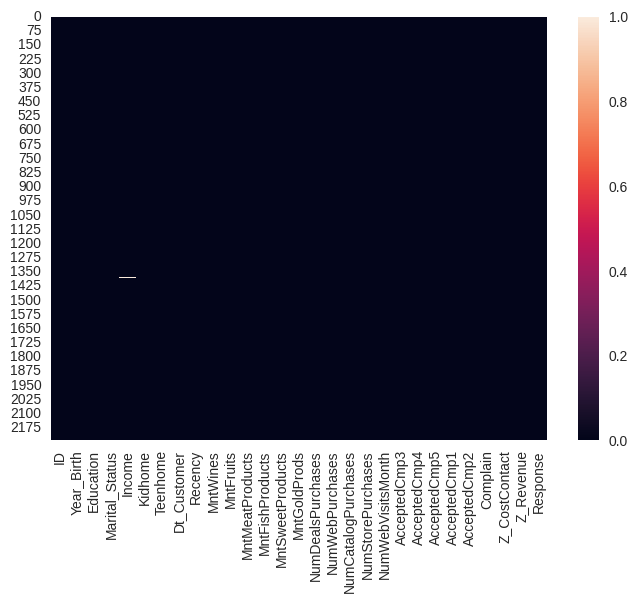

In [5]:
sns.heatmap(df.isna())

In [6]:
#printing % of missing values present at each columns
for i in df.isna().sum():
    print(f"Missing values are: {i/len(df)*100}")


Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 1.0714285714285714
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0


<Axes: >

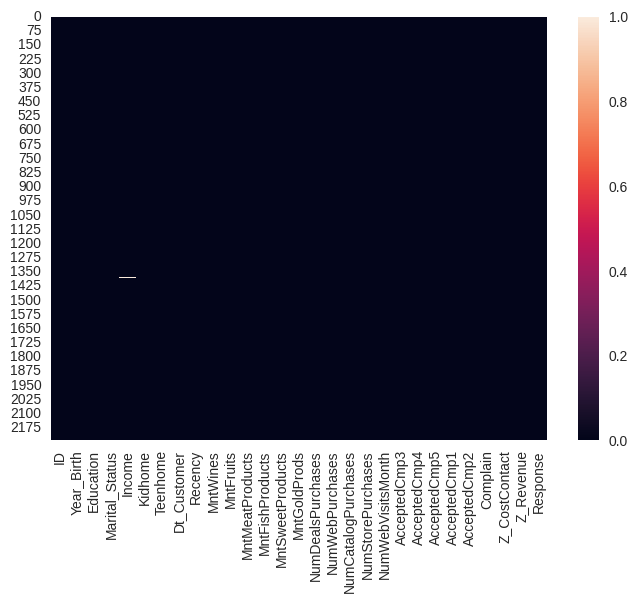

In [7]:
#before droping na values
sns.heatmap(df.isna())

In [8]:
#only 1% missing value so we drop na values
df = df.dropna()
print("The total number of data-points after removing the rows ehich having missing values are:", len(df))
print(df.shape)

The total number of data-points after removing the rows ehich having missing values are: 2216
(2216, 29)


<Axes: >

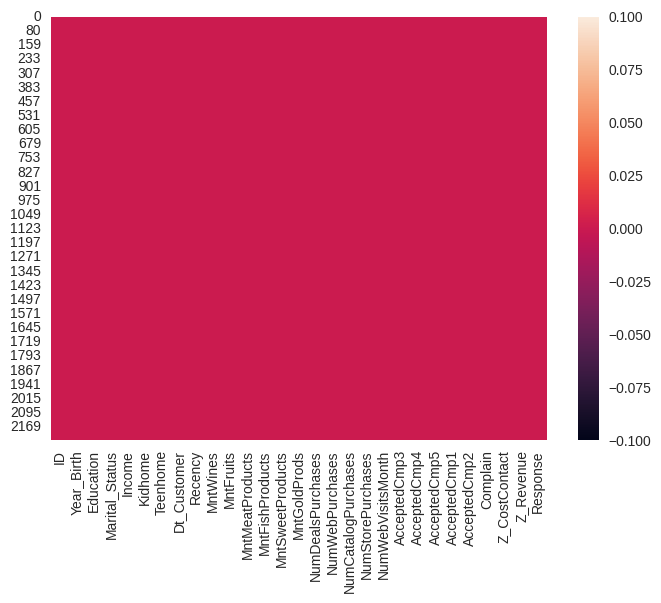

In [9]:
#After Droping Na values
sns.heatmap(df.isna())

# ***Duplicated Records***

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2216, dtype: bool

In [11]:
df.duplicated().sum()
#there is no duplicated records

0

# ***Feature Engineering for dt_customer***

 We will  going to create a feature out of "Dt_Customer" that indicates the number of years a customer is registered in the database.


In [12]:
import datetime
#Created a feature "Customer_For"
def get_different_year():
    registration_year = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y').apply(lambda x: x.year)
    current_year = datetime.datetime.now().year
    return current_year - registration_year

df['Years_Since_Registration'] = get_different_year()  # Number of years since customer registration
df["Years_Since_Registration"] = pd.to_numeric(df["Years_Since_Registration"], errors="coerce")
df["Years_Since_Registration"]

<ipython-input-12-7edd8bf833c8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-7edd8bf833c8>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       11
1        9
2       10
3        9
4        9
        ..
2235    10
2236     9
2237     9
2238     9
2239    11
Name: Years_Since_Registration, Length: 2216, dtype: int64

# ***Now we will deal with categorical columns***


1.   Marital_Status

In [13]:
print("CATEGORICAL FEATURE IN Marital_Status column :" ,df["Marital_Status"].unique())
print("TOTAL CATEGORICAL FEATURE IN Marital_Status column :", df["Marital_Status"].nunique())

#values counts of each_feature
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")


CATEGORICAL FEATURE IN Marital_Status column : ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
TOTAL CATEGORICAL FEATURE IN Marital_Status column : 8
Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 




2.   Education



In [14]:
print("CATEGORICAL FEATURE IN Education column :" ,df["Education"].unique())
print("TOTAL CATEGORICAL FEATURE IN Marital_Status column :", df["Education"].nunique())

#values counts of each_feature
print("Total categories in the feature Marital_Status:\n", df["Education"].value_counts(), "\n")


CATEGORICAL FEATURE IN Education column : ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
TOTAL CATEGORICAL FEATURE IN Marital_Status column : 5
Total categories in the feature Marital_Status:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64 



# ***3) Visualization***

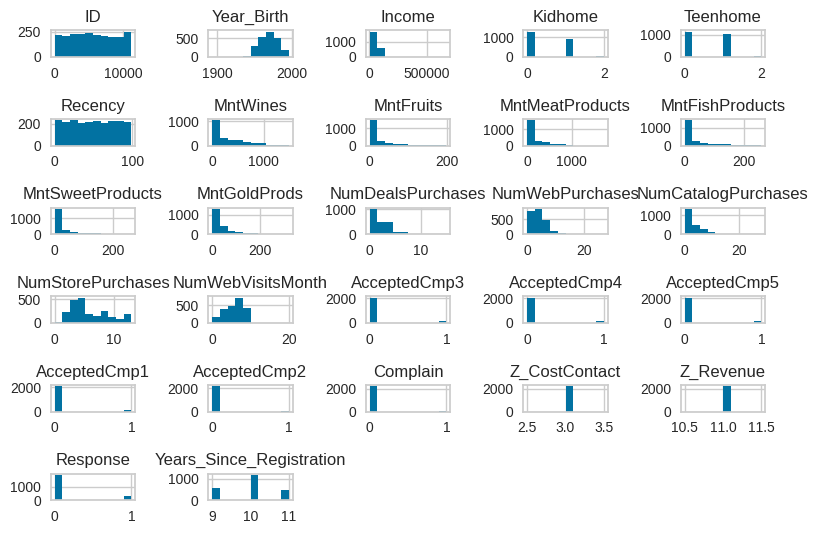

In [15]:
df.hist()
plt.tight_layout()

<Axes: xlabel='Marital_Status'>

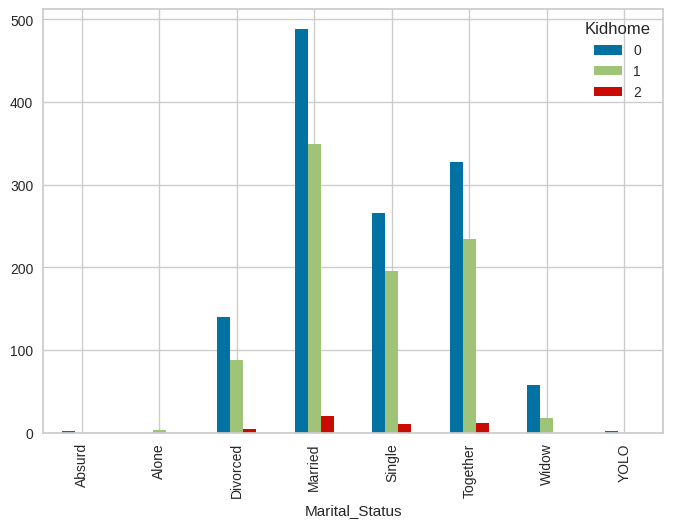

In [16]:
pd.crosstab(df.Marital_Status, df.Kidhome).plot(kind='bar')

<Axes: xlabel='Education'>

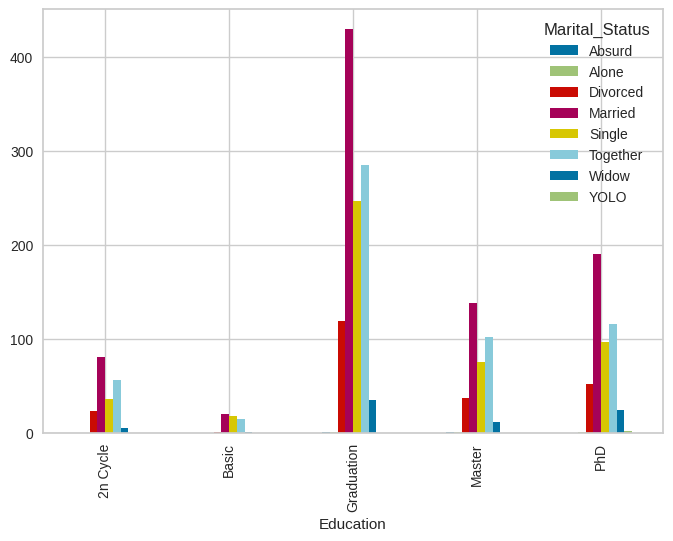

In [17]:
pd.crosstab(df.Education,df.Marital_Status).plot(kind="bar")

<Axes: xlabel='Teenhome'>

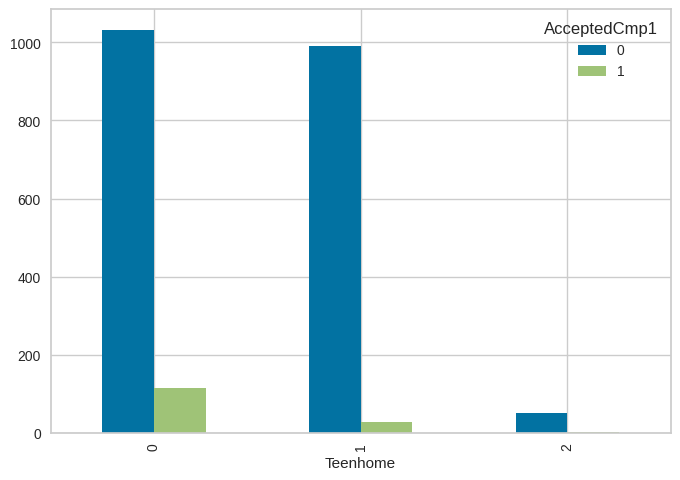

In [18]:
pd.crosstab(df.Teenhome, df.AcceptedCmp1).plot(kind='bar')

<Axes: xlabel='Teenhome'>

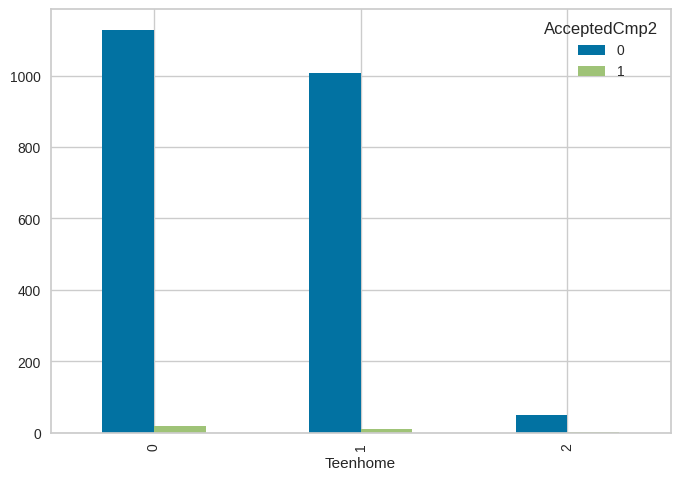

In [19]:
pd.crosstab(df.Teenhome, df.AcceptedCmp2).plot(kind='bar')

<Axes: xlabel='Teenhome'>

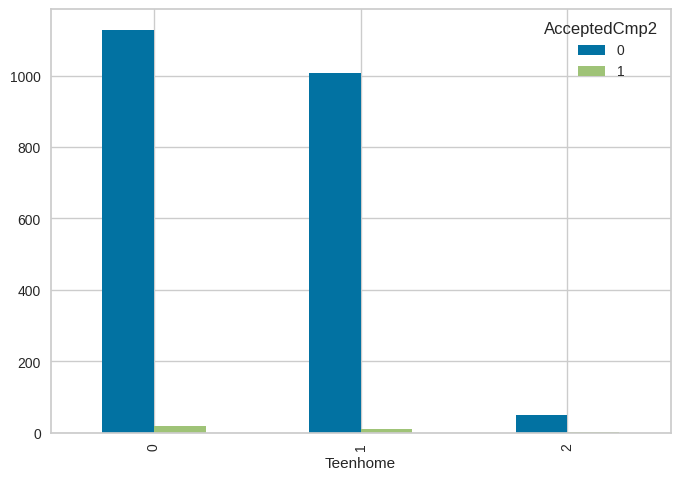

In [20]:
pd.crosstab(df.Teenhome, df.AcceptedCmp2).plot(kind='bar')

<Axes: xlabel='Teenhome'>

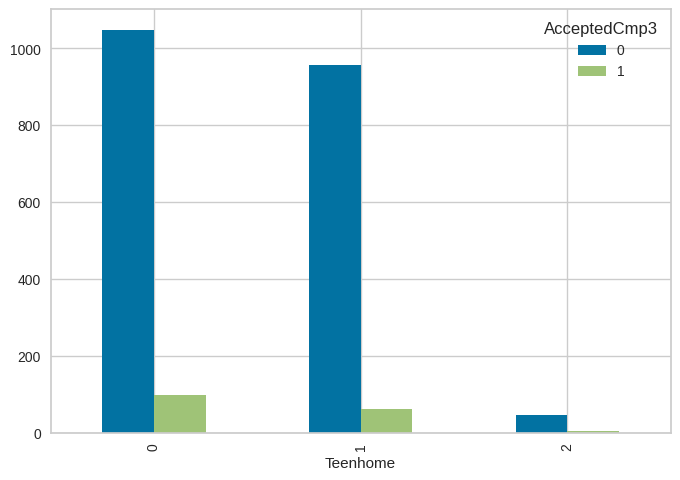

In [21]:
pd.crosstab(df.Teenhome, df.AcceptedCmp3).plot(kind='bar')

<Axes: xlabel='Teenhome'>

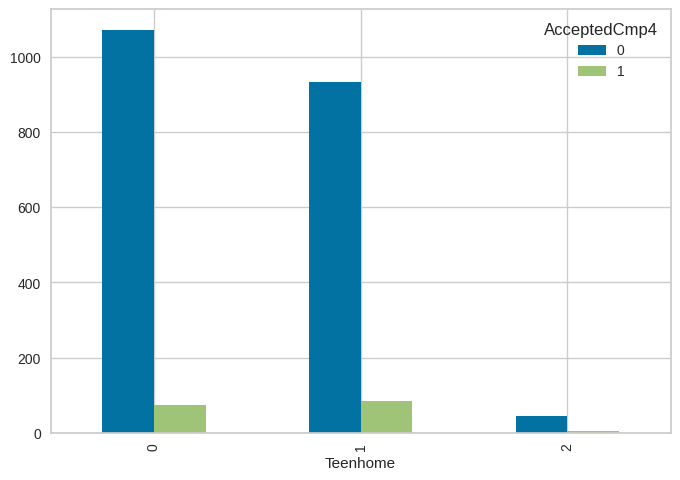

In [22]:
pd.crosstab(df.Teenhome, df.AcceptedCmp4).plot(kind='bar')

<Axes: xlabel='Teenhome'>

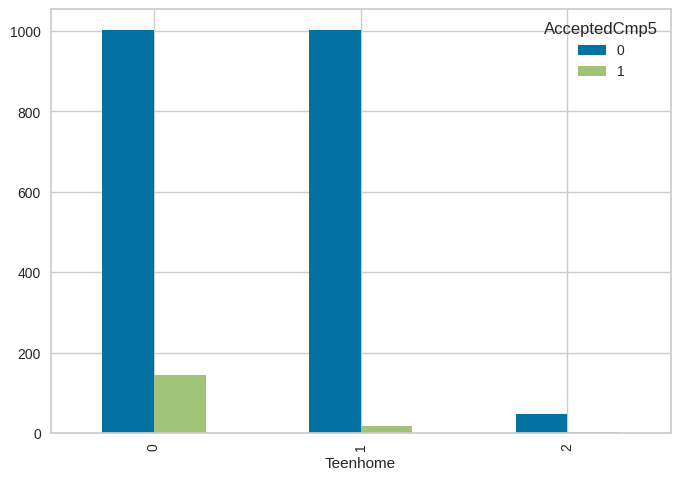

In [23]:
pd.crosstab(df.Teenhome, df.AcceptedCmp5).plot(kind='bar')

<Axes: xlabel='AcceptedCmp1'>

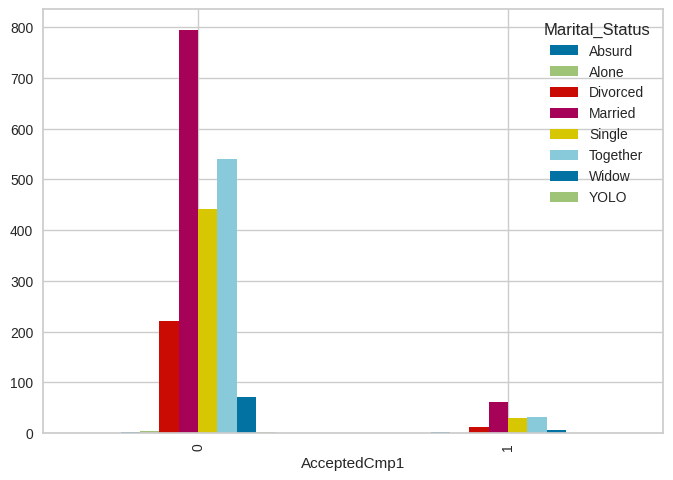

In [24]:
pd.crosstab(df.AcceptedCmp1,df.Marital_Status).plot(kind='bar')

<Axes: xlabel='AcceptedCmp2'>

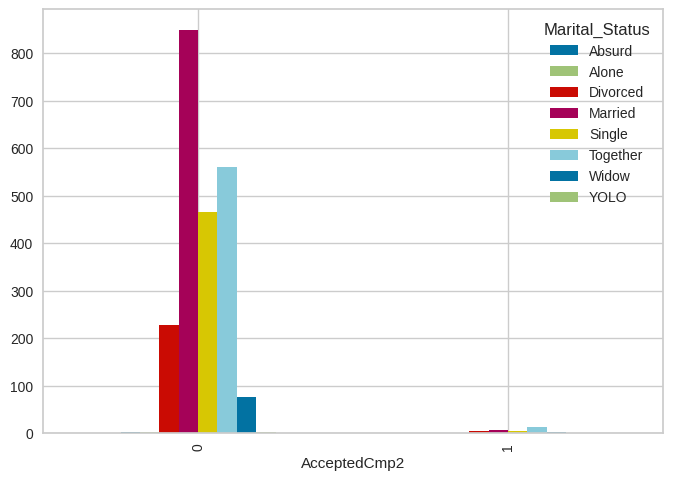

In [25]:
pd.crosstab(df.AcceptedCmp2,df.Marital_Status).plot(kind='bar')

<Axes: xlabel='AcceptedCmp3'>

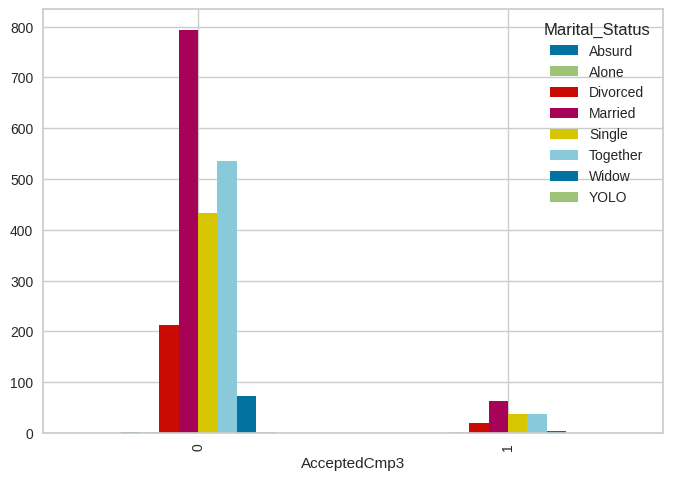

In [26]:
pd.crosstab(df.AcceptedCmp3,df.Marital_Status).plot(kind='bar')

<Axes: xlabel='AcceptedCmp4'>

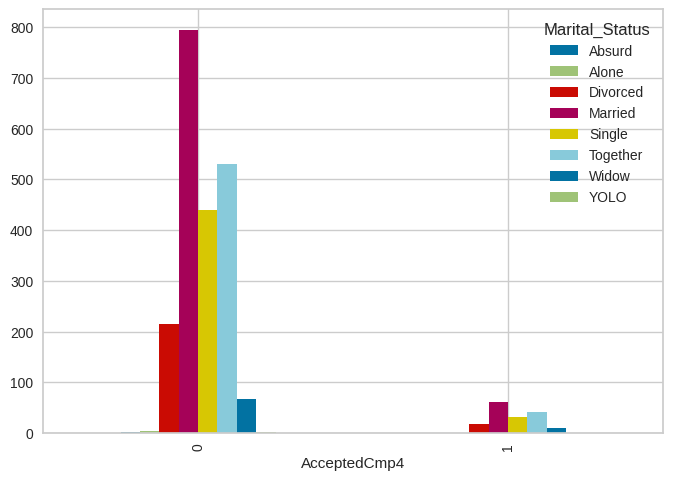

In [27]:
pd.crosstab(df.AcceptedCmp4,df.Marital_Status).plot(kind='bar')

<Axes: xlabel='AcceptedCmp5'>

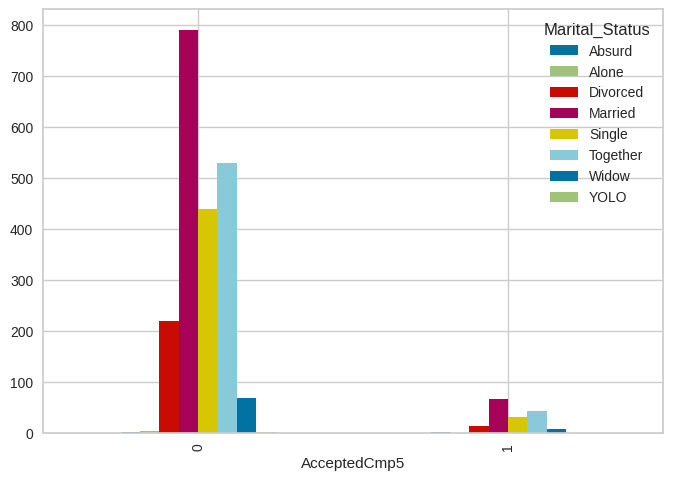

In [28]:
pd.crosstab(df.AcceptedCmp5,df.Marital_Status).plot(kind='bar')

<Axes: xlabel='Education'>

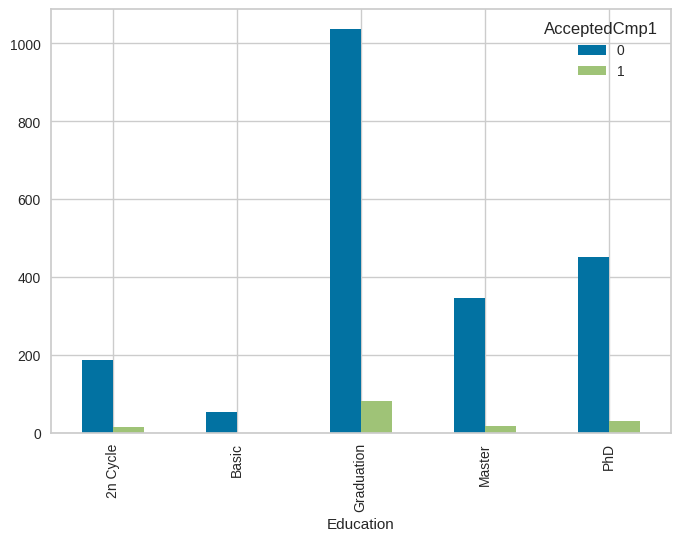

In [29]:
pd.crosstab(df.Education,df.AcceptedCmp1).plot(kind='bar')

<Axes: xlabel='Education', ylabel='count'>

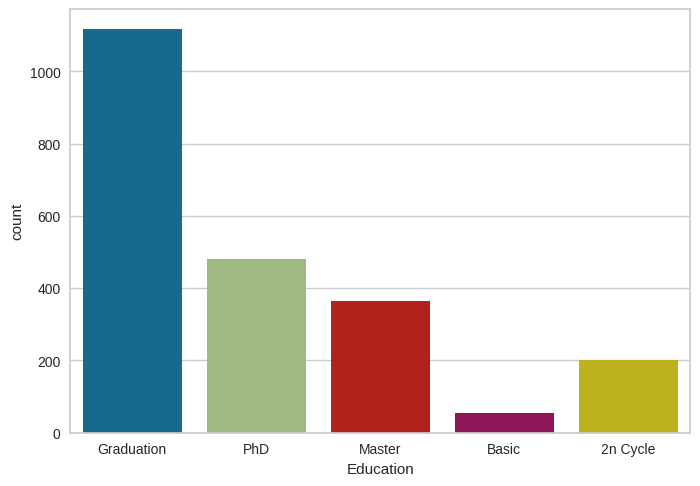

In [30]:
sns.countplot(x = df["Education"])

<Axes: xlabel='Marital_Status', ylabel='count'>

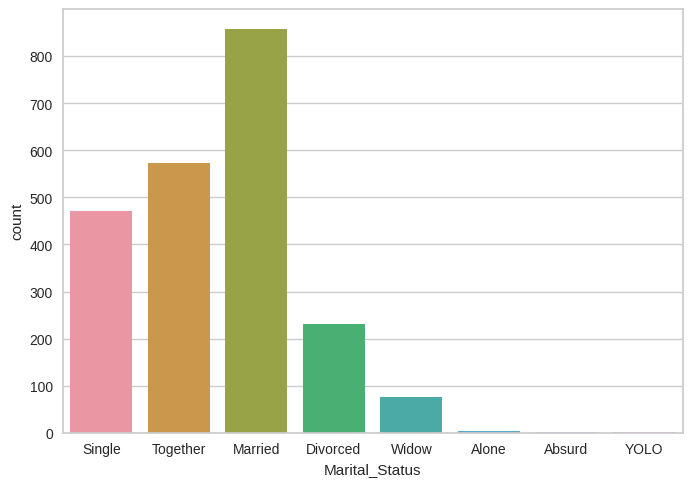

In [31]:
sns.countplot(x = df['Marital_Status'])

Text(0, 0.5, 'Income')

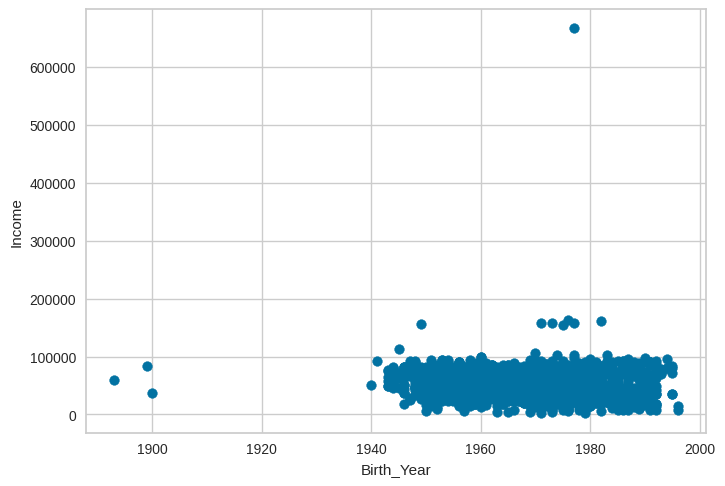

In [32]:
plt.scatter(df.Year_Birth,df.Income)
plt.xlabel("Birth_Year")
plt.ylabel("Income")

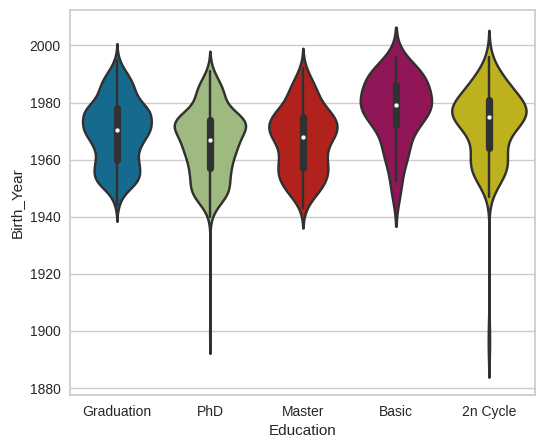

In [33]:
plt.figure(figsize = (6,5))
sns.violinplot(x = "Education",y = "Year_Birth", data = df)
plt.ylabel("Birth_Year")
plt.show()

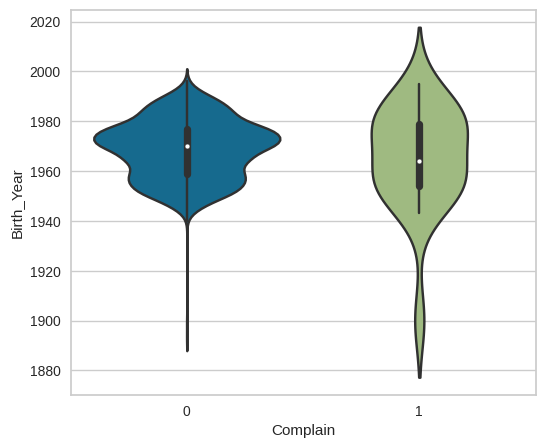

In [34]:
plt.figure(figsize = (6,5))
sns.violinplot(x = "Complain",y = "Year_Birth", data = df)
plt.ylabel("Birth_Year")
plt.show()

# ***Feature Engineering***

In [35]:
#Customer_age = Today - Year_Birth
today = 2023
df["Customer_Age"] = today - df["Year_Birth"]

#customer Total Spending on products
#customer_spent = MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds
df["Customer_Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

#Customer Total Peerchases
#customer_purcheses = NumDealsPurchases + NumWebPurchases + NumCatalogPurchases + NumStorePurchases
df["Total_purcheses"] = df["NumDealsPurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

#customer average purchese

#Minor_Home = df["Kidhome"] + df["Teenhome"]
df["Minor_Home"] = df["Kidhome"] + df["Teenhome"]

#total accepeted compony by each customer
df["Total_Accept_cmp"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"]

#Deriving living situation by marital status"Alone"
#we will 5 values in to 2 unique values which is alone and or having partner
df["Living_With"] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Segmenting education levels in three groups
#we will convert different categories in Undergraduate, Graduate Postgraduate
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})


<ipython-input-35-1c8d52e3309a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-1c8d52e3309a>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-1c8d52e3309a>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-1c8d52

# ***Droping some Unecessary Features***

In [36]:
df.drop(columns = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth"],inplace = True)
df

<ipython-input-36-90668ae8e483>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Response,Years_Since_Registration,Customer_Age,Customer_Spent,Total_purcheses,Minor_Home,Total_Accept_cmp,Living_With
0,5524,Graduate,58138.0,0,0,58,635,88,546,172,...,0,0,1,11,66,1617,25,0,0,Alone
1,2174,Graduate,46344.0,1,1,38,11,1,6,2,...,0,0,0,9,69,27,6,2,0,Alone
2,4141,Graduate,71613.0,0,0,26,426,49,127,111,...,0,0,0,10,58,776,21,0,0,Partner
3,6182,Graduate,26646.0,1,0,26,11,4,20,10,...,0,0,0,9,39,53,8,1,0,Partner
4,5324,Postgraduate,58293.0,1,0,94,173,43,118,46,...,0,0,0,9,42,422,19,1,0,Partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduate,61223.0,0,1,46,709,43,182,42,...,0,0,0,10,56,1341,18,1,0,Partner
2236,4001,Postgraduate,64014.0,2,1,56,406,0,30,0,...,0,0,0,9,77,444,22,3,1,Partner
2237,7270,Graduate,56981.0,0,0,91,908,48,217,32,...,0,0,0,9,42,1241,19,0,1,Alone
2238,8235,Postgraduate,69245.0,0,1,8,428,30,214,80,...,0,0,0,9,67,843,23,1,0,Partner


In [37]:
df.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Years_Since_Registration,Customer_Age,Customer_Spent,Total_purcheses,Minor_Home,Total_Accept_cmp
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,0.064079,0.013538,0.009477,0.150271,9.971570,54.179603,607.075361,14.880866,0.947202,0.298285
std,3249.376275,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,0.244950,0.115588,0.096907,0.357417,0.685618,11.985554,602.900476,7.670957,0.749062,0.679209
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,27.000000,5.000000,0.000000,0.000000,0.000000
25%,2814.750000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,10.000000,46.000000,69.000000,8.000000,0.000000,0.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,10.000000,53.000000,396.500000,15.000000,1.000000,0.000000
75%,8421.750000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,10.000000,64.000000,1048.000000,21.000000,1.000000,0.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,1.000000,11.000000,130.000000,2525.000000,44.000000,3.000000,4.000000


# ***4) Outlier Detection***

Mainly outlier are in age and Income columns
other than that all are natural outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x7860d006d780>,
 'caps': [<matplotlib.lines.Line2D at 0x7860d050db10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7860d006d930>],
 'medians': [<matplotlib.lines.Line2D at 0x7860d050f5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7860d050d5d0>],
 'means': []}

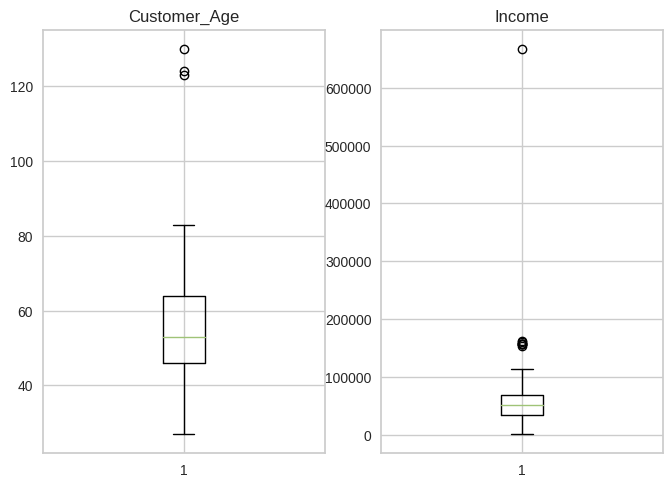

In [38]:
#Visualization of outlier values

plt.subplot(1,2,1)
plt.title("Customer_Age")
plt.boxplot(df["Customer_Age"])


plt.subplot(1,2,2)
plt.title("Income")
plt.boxplot(df["Income"])


# ***Creating user define function for outlier detection***

In [39]:
def outlier_detection(df,col):
# Calculate the upper and lower limits
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
  upper_array = np.where(df[col]>=upper)[0]
  lower_array = np.where(df[col]<=lower)[0]
  print("Lower Limit Is : ",lower)
  print("Upper Limit Is : ",upper)
  print("outlier datapoints in upper array : ",lower_array)
  print("outlier datapoints in upper array : ",upper_array)


In [40]:
#Printing outlier of customer_age col
print(df.shape)
outlier_detection(df,"Customer_Age")

(2216, 31)
Lower Limit Is :  19.0
Upper Limit Is :  91.0
outlier datapoints in upper array :  []
outlier datapoints in upper array :  [181 228 326]


In [41]:
#Data points 181,228,326 are outlier datapoints
#Droping that data points

df = df[(df["Customer_Age"]<91)]

print("The total number of data-points after removing the outliers of Customer_Age:", len(df))



The total number of data-points after removing the outliers of Customer_Age: 2213


In [42]:
df.shape

(2213, 31)

In [43]:
#Printing outlier of Income col
print(df.shape)
outlier_detection(df,"Income")

(2213, 31)
Lower Limit Is :  -14615.5
Upper Limit Is :  118348.5
outlier datapoints in upper array :  []
outlier datapoints in upper array :  [ 153  601  639  671 1284 1633 2106 2206]


In [44]:
 #droping that data points

df = df[(df["Income"]<600000)]

print("The total number of data-points after removing the outliers :", len(df))


The total number of data-points after removing the outliers : 2212


In [45]:
df.shape

(2212, 31)

In [46]:
df.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Years_Since_Registration,Customer_Age,Customer_Spent,Total_purcheses,Minor_Home,Total_Accept_cmp
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,5585.160940,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,...,0.064195,0.013562,0.009042,0.150542,9.971971,54.086347,607.268083,14.891501,0.947559,0.298373
std,3247.523735,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,...,0.245156,0.115691,0.094678,0.357683,0.685926,11.701599,602.513364,7.671629,0.749466,0.679570
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,27.000000,5.000000,0.000000,0.000000,0.000000
25%,2814.750000,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,10.000000,46.000000,69.000000,8.000000,0.000000,0.000000
50%,5454.500000,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,10.000000,53.000000,397.000000,15.000000,1.000000,0.000000
75%,8418.500000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,10.000000,64.000000,1048.000000,21.000000,1.000000,0.000000
max,11191.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,1.000000,11.000000,83.000000,2525.000000,44.000000,3.000000,4.000000


<ipython-input-47-ad08fa4c206b>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

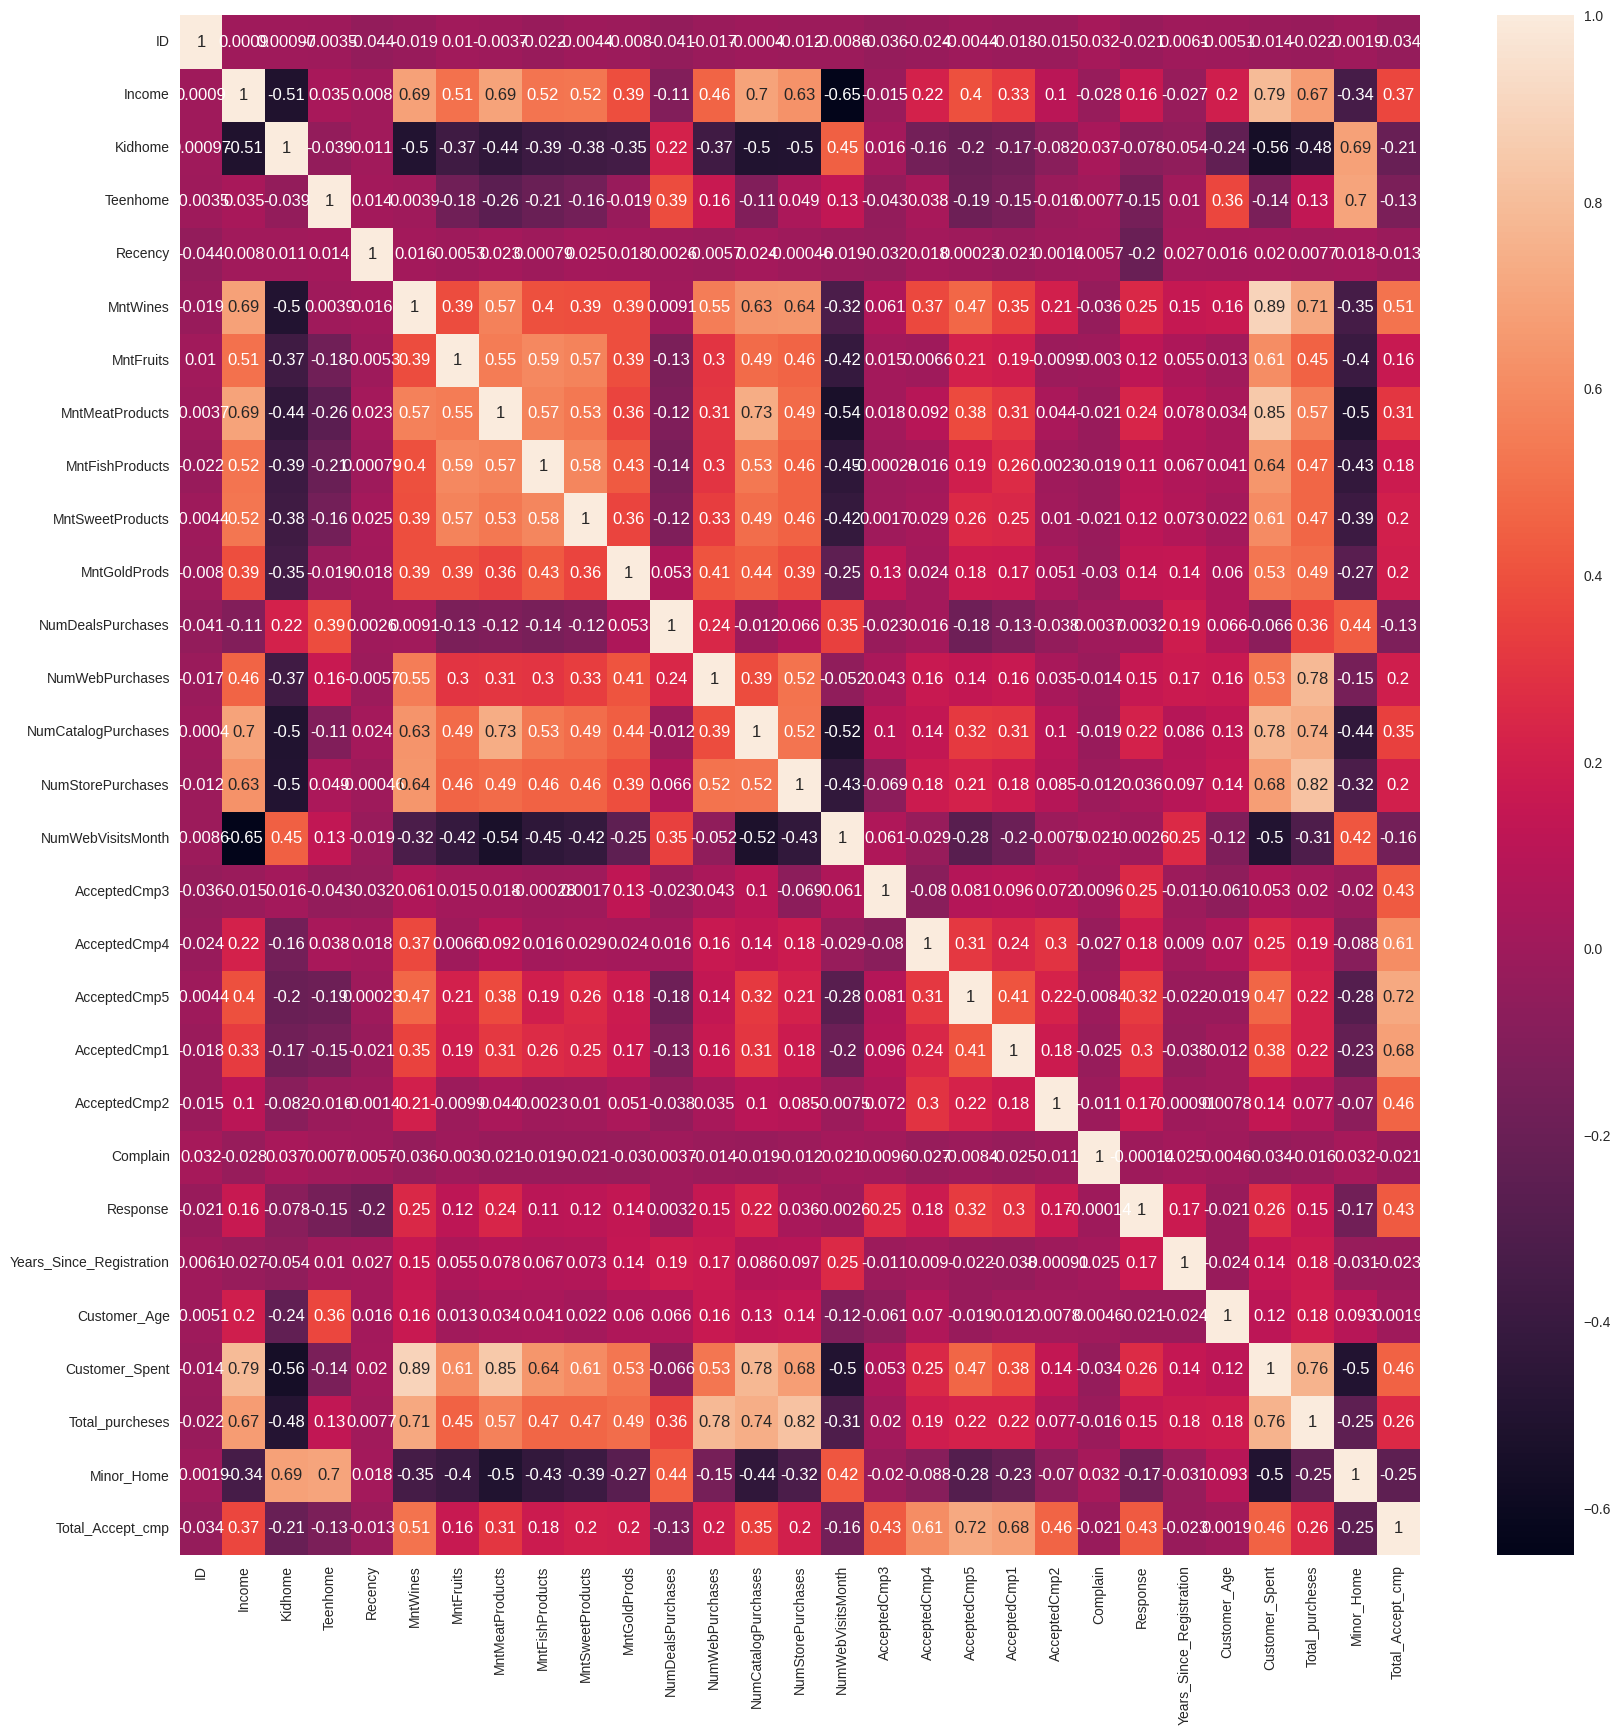

In [47]:
#Correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

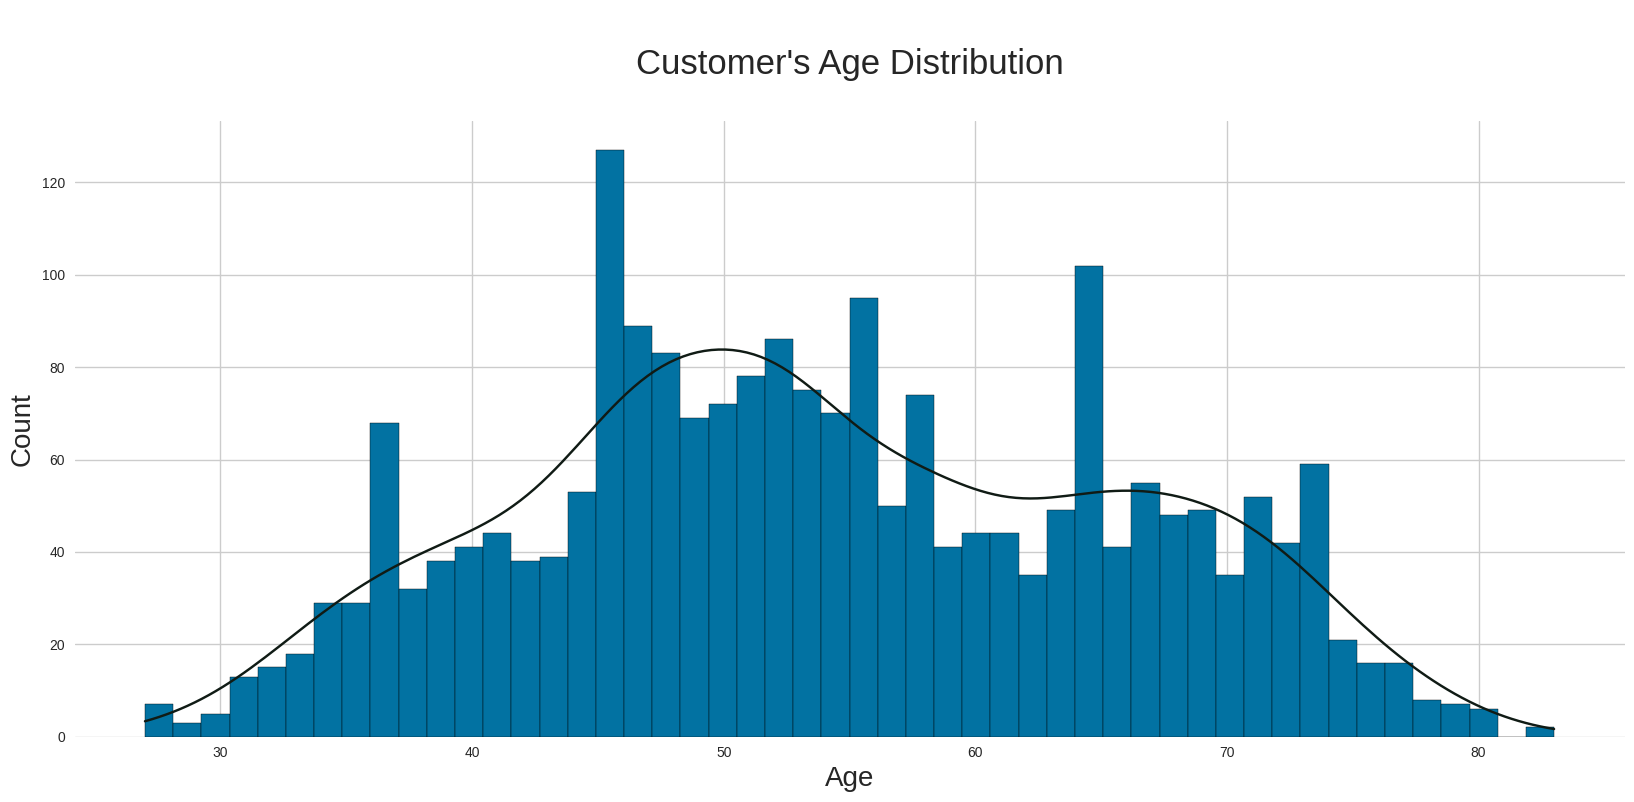

In [48]:
#Distribution of customer Age
plt.subplots(figsize=(20, 8))
p = sns.histplot(df["Customer_Age"],kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Age",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()


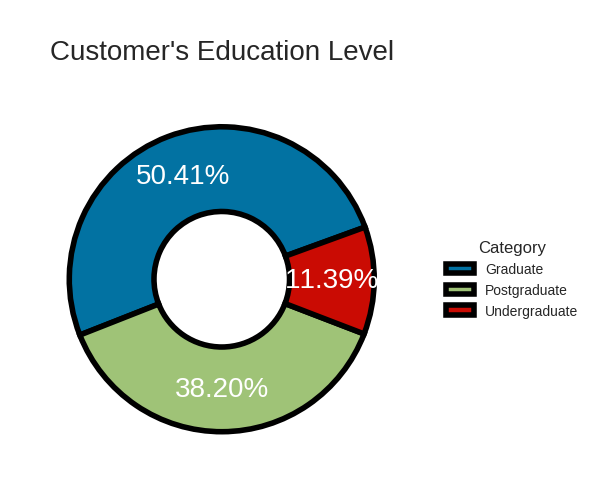

In [49]:
labels = "Graduate","Postgraduate","Undergraduate"
size = 0.5

wedges, texts, autotexts = plt.pie([df["Education"].value_counts()[0],
                                    df["Education"].value_counts()[1],
                                    df["Education"].value_counts()[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.72,
                                    radius=.9,
                                    wedgeprops=dict(width = size, edgecolor = "black",
                                    linewidth = 4),
                                    startangle = 20)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nCustomer's Education Level",fontsize=20);
plt.show()


In [50]:
df.columns

Index(['ID', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Years_Since_Registration', 'Customer_Age', 'Customer_Spent',
       'Total_purcheses', 'Minor_Home', 'Total_Accept_cmp', 'Living_With'],
      dtype='object')

# ***Droping Columns***

In [51]:
df.drop(columns = ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Complain","Response"],inplace = True)

In [52]:
df.shape

(2212, 24)

# ***Encoding***

In [53]:
df.columns

Index(['ID', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Years_Since_Registration', 'Customer_Age',
       'Customer_Spent', 'Total_purcheses', 'Minor_Home', 'Total_Accept_cmp',
       'Living_With'],
      dtype='object')

In [54]:
df.shape

(2212, 24)

In [55]:
df["Living_With"]

0         Alone
1         Alone
2       Partner
3       Partner
4       Partner
         ...   
2235    Partner
2236    Partner
2237      Alone
2238    Partner
2239    Partner
Name: Living_With, Length: 2212, dtype: object

In [56]:
from sklearn.preprocessing import LabelEncoder
#we used lebal encoding
le = LabelEncoder()
#for Education Column
df["Education"]  =le.fit_transform(df["Education"])
print(df["Education"].unique)
print(df["Education"].value_counts())

<bound method Series.unique of 0       0
1       0
2       0
3       0
4       1
       ..
2235    0
2236    1
2237    0
2238    1
2239    1
Name: Education, Length: 2212, dtype: int64>
0    1115
1     845
2     252
Name: Education, dtype: int64


In [57]:
#for Living_With Column
df["Living_With"]  =le.fit_transform(df["Living_With"])
print(df["Living_With"].unique)
print(df["Living_With"].value_counts())

<bound method Series.unique of 0       0
1       0
2       1
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Living_With, Length: 2212, dtype: int64>
1    1428
0     784
Name: Living_With, dtype: int64


In [58]:
df["Living_With"].head()

0    0
1    0
2    1
3    1
4    1
Name: Living_With, dtype: int64

# ***5) Dimensionality Reduction***

# ***Dimensionality Reduction using PCA***

In [59]:
df

,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Years_Since_Registration,Customer_Age,Customer_Spent,Total_purcheses,Minor_Home,Total_Accept_cmp,Living_With
0,5524,0,58138.0,0,0,58,635,88,546,172,...,10,4,7,11,66,1617,25,0,0,0
1,2174,0,46344.0,1,1,38,11,1,6,2,...,1,2,5,9,69,27,6,2,0,0
2,4141,0,71613.0,0,0,26,426,49,127,111,...,2,10,4,10,58,776,21,0,0,1
3,6182,0,26646.0,1,0,26,11,4,20,10,...,0,4,6,9,39,53,8,1,0,1
4,5324,1,58293.0,1,0,94,173,43,118,46,...,3,6,5,9,42,422,19,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,0,61223.0,0,1,46,709,43,182,42,...,3,4,5,10,56,1341,18,1,0,1
2236,4001,1,64014.0,2,1,56,406,0,30,0,...,2,5,7,9,77,444,22,3,1,1
2237,7270,0,56981.0,0,0,91,908,48,217,32,...,3,13,6,9,42,1241,19,0,1,0
2238,8235,1,69245.0,0,1,8,428,30,214,80,...,5,10,3,9,67,843,23,1,0,1


In [60]:
df1=df

In [61]:
#Scaling
scaler = StandardScaler()
scaler.fit(df1)
scaled_df1 = pd.DataFrame(scaler.transform(df1),columns= df1.columns )
print("All features are now scaled")

All features are now scaled


In [62]:
scaled_df1

,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Years_Since_Registration,Customer_Age,Customer_Spent,Total_purcheses,Minor_Home,Total_Accept_cmp,Living_With
0,-0.018837,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,...,2.503607,-0.555814,0.692181,1.499086,1.018352,1.676245,1.317945,-1.264598,-0.439160,-1.349603
1,-1.050626,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,...,-0.571340,-1.171160,-0.132545,-1.417341,1.274785,-0.963297,-1.159273,1.404572,-0.439160,-1.349603
2,-0.444797,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,...,-0.229679,1.290224,-0.544908,0.040872,0.334530,0.280110,0.796425,-1.264598,-0.439160,0.740959
3,0.183824,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,...,-0.913000,-0.555814,0.279818,-1.417341,-1.289547,-0.920135,-0.898513,0.069987,-0.439160,0.740959
4,-0.080437,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,...,0.111982,0.059532,-0.132545,-1.417341,-1.033114,-0.307562,0.535666,0.069987,-0.439160,0.740959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,1.627712,-0.893586,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,...,0.111982,-0.555814,-0.132545,0.040872,0.163575,1.218061,0.405286,0.069987,-0.439160,0.740959
2208,-0.487916,0.571657,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,...,-0.229679,-0.248141,0.692181,-1.417341,1.958607,-0.271040,0.926805,2.739158,1.032691,0.740959
2209,0.518925,-0.893586,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,...,0.111982,2.213242,0.279818,-1.417341,-1.033114,1.052052,0.535666,-1.264598,1.032691,-1.349603
2210,0.816141,0.571657,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,...,0.795303,1.290224,-0.957271,-1.417341,1.103830,0.391336,1.057185,0.069987,-0.439160,0.740959


In [63]:
#Initiating PCA to reduce dimentions  features to 4
pca = PCA(n_components=3)
pca.fit(scaled_df1)
PCA_df1 = pd.DataFrame(pca.transform(scaled_df1), columns=(["col1","col2", "col3"]))
PCA_df1.describe().T


,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-8.672990e-17,2.884578,-5.191843,-2.723077,-0.583829,2.538459,7.941883
col2,2212.0,1.284887e-17,1.599902,-3.432350,-1.333530,-0.221425,1.110869,5.801692
col3,2212.0,-1.043971e-17,1.208096,-3.473429,-0.825805,-0.004219,0.834287,5.717052


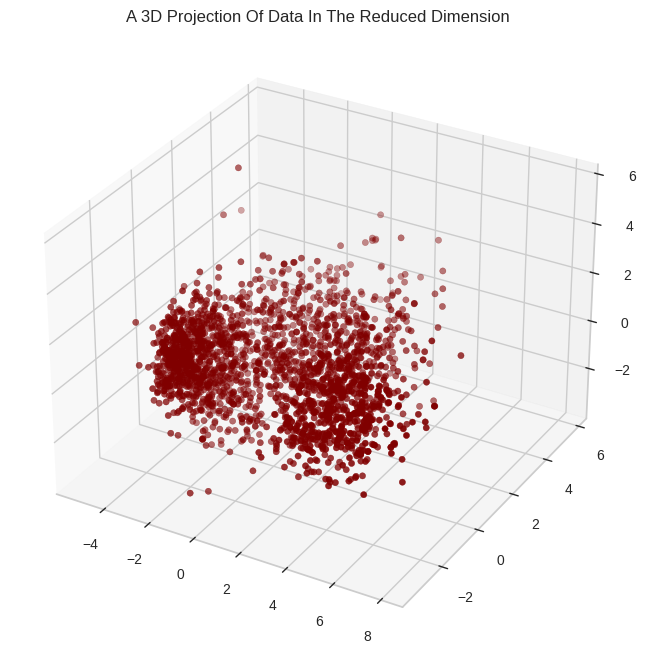

In [64]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df1["col1"]
y =PCA_df1["col2"]
z =PCA_df1["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()


Customer Analytics by **STP** : Segmentation, Targeting and Positioning

1-Segmentation: dividing a population into groups that share similar charachteristics.

2-Targeting: evaluating potential profits from segments and deciding which segment to focus on.

3-Positioning: what product would have the closest characteristics to customers' need.




# ***6) Clustering***
# ***KMeans***

In [65]:
PCA_df1

,col1,col2,col3
0,4.515091,0.128506,1.918960
1,-3.015229,0.163110,-2.224038
2,2.220466,-0.471550,-0.002457
3,-2.859733,-1.462765,0.166163
4,-0.308775,-0.004011,0.434721
...,...,...,...
2207,2.786868,1.276720,0.286419
2208,-1.537338,4.043266,-1.104608
2209,2.068019,-1.302156,0.031777
2210,2.071833,0.862318,-2.073090


In [66]:
km = KMeans() #by default it has form 8 clusters
y = km.fit_predict(PCA_df1)
y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([7, 0, 1, ..., 1, 4, 0], dtype=int32)

# ***Elbow Graph***

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

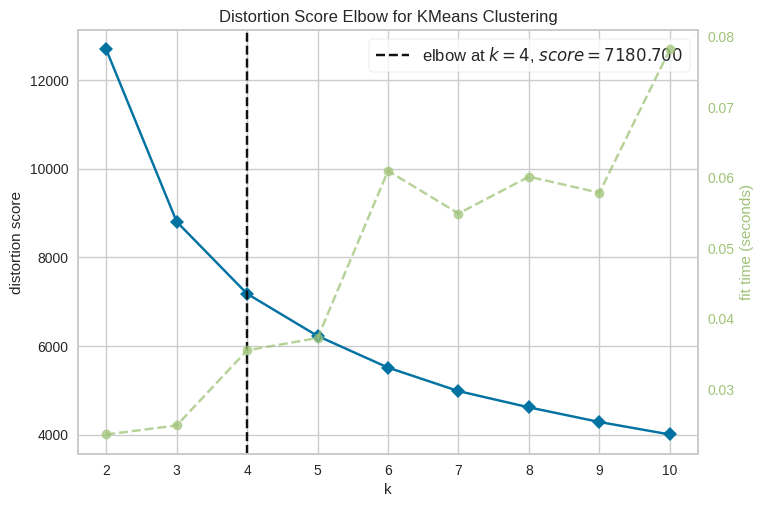

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df1)
Elbow_M.show()

In [68]:
#we will select 4 clusters
km = KMeans(n_clusters=4)
y = km.fit_predict(PCA_df1)
y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([2, 0, 2, ..., 2, 1, 0], dtype=int32)

In [69]:
df["Clusters"] = y

In [70]:
df.columns

Index(['ID', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Years_Since_Registration', 'Customer_Age',
       'Customer_Spent', 'Total_purcheses', 'Minor_Home', 'Total_Accept_cmp',
       'Living_With', 'Clusters'],
      dtype='object')

In [71]:
df["Clusters"].value_counts() #data point every  are distributed equallty in clusters

3    593
2    550
1    539
0    530
Name: Clusters, dtype: int64

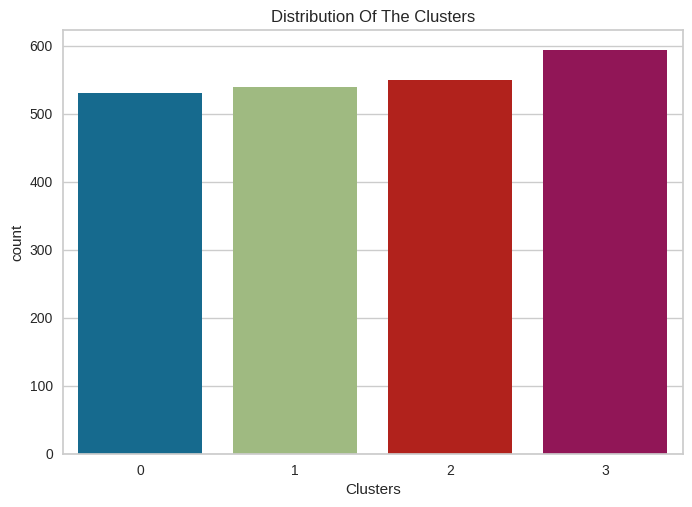

In [72]:
#Plotting countplot of clusters
sns.countplot(x=df["Clusters"])
plt.title("Distribution Of The Clusters")
plt.show()


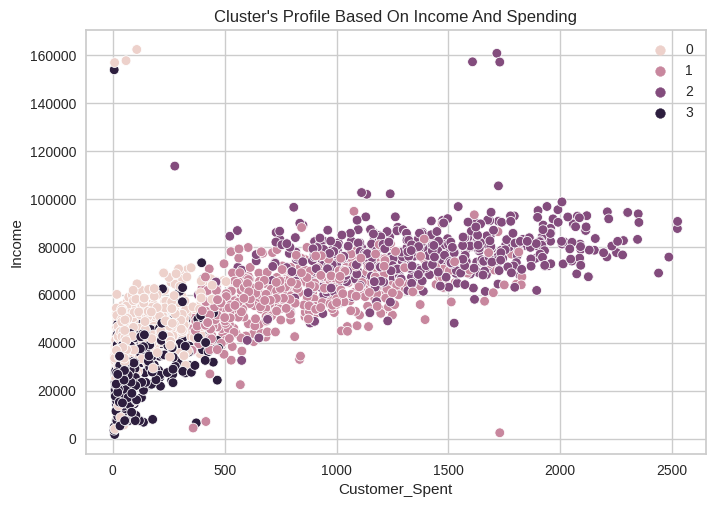

In [73]:
pl = sns.scatterplot(data = df,x=df["Customer_Spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()


cluster 3 highest spent and highest earning

cluster 2 lowest spent low income

cluster 0 high income low spend


cluster 1 high income high spending


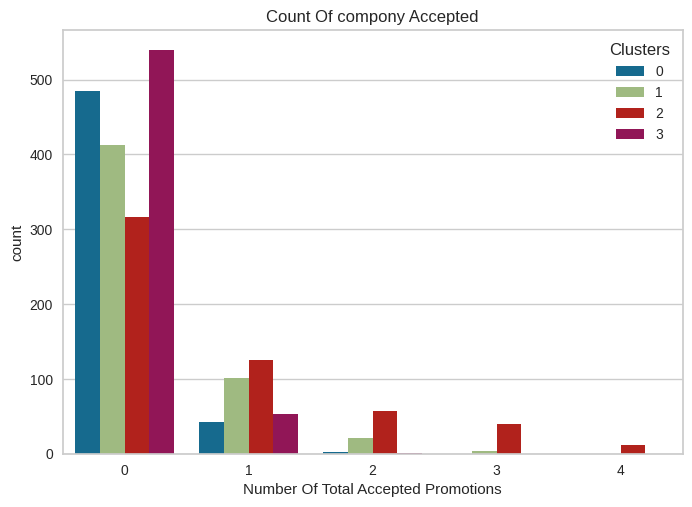

In [74]:
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Accept_cmp"],hue=df["Clusters"])
pl.set_title("Count Of compony Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()


There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.



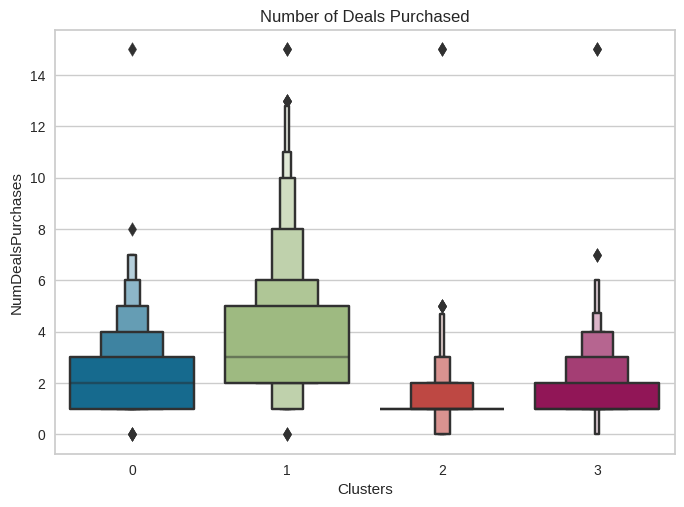

In [75]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

cluster 1 and cluster 3 have purchese most of the deals

cluster 0 has purchses very less deals

clusters 2 has purcheses least deals

<Figure size 800x550 with 0 Axes>

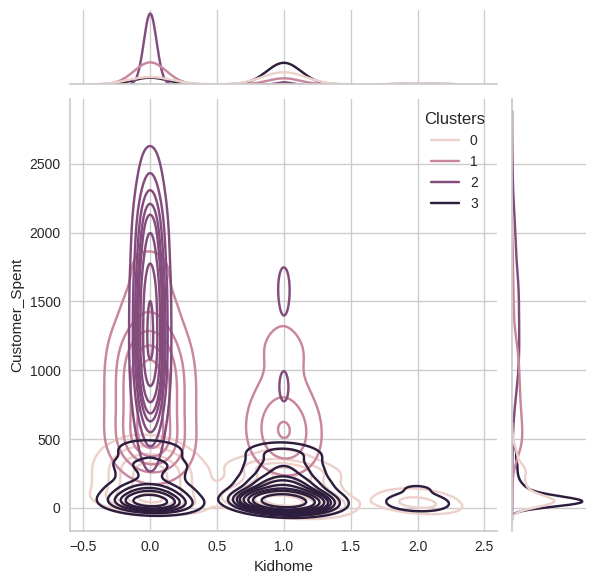

<Figure size 800x550 with 0 Axes>

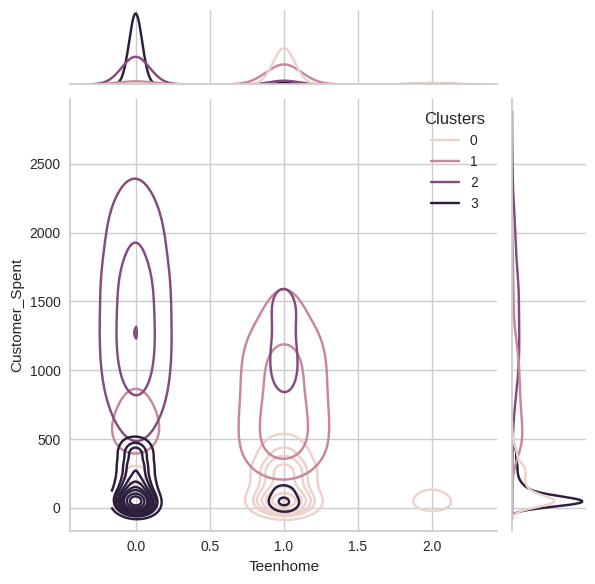

<Figure size 800x550 with 0 Axes>

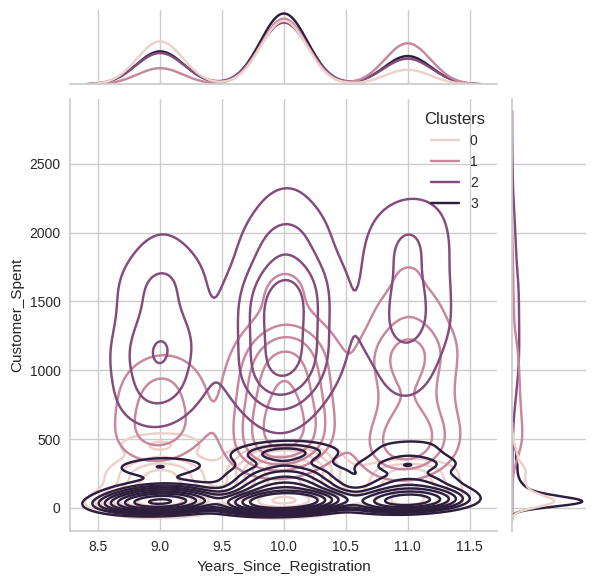

<Figure size 800x550 with 0 Axes>

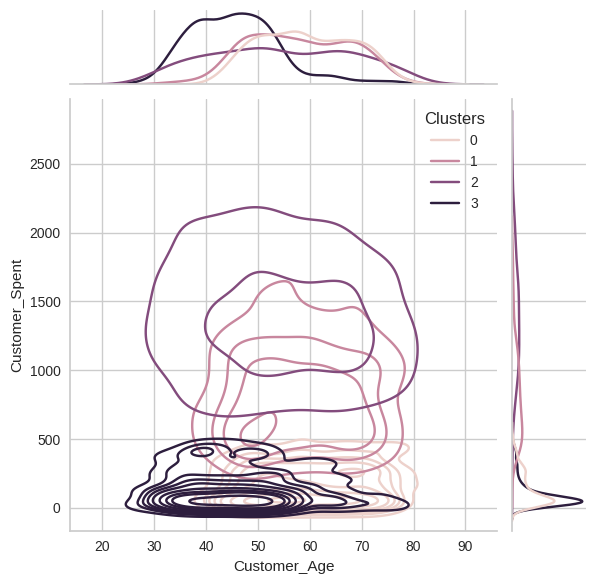

<Figure size 800x550 with 0 Axes>

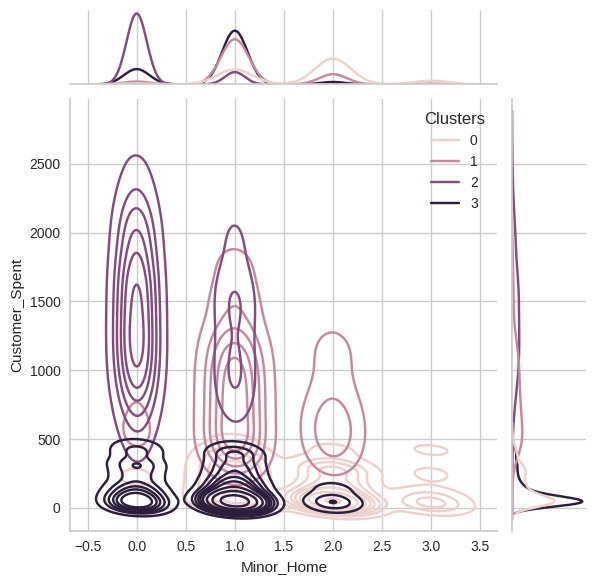

<Figure size 800x550 with 0 Axes>

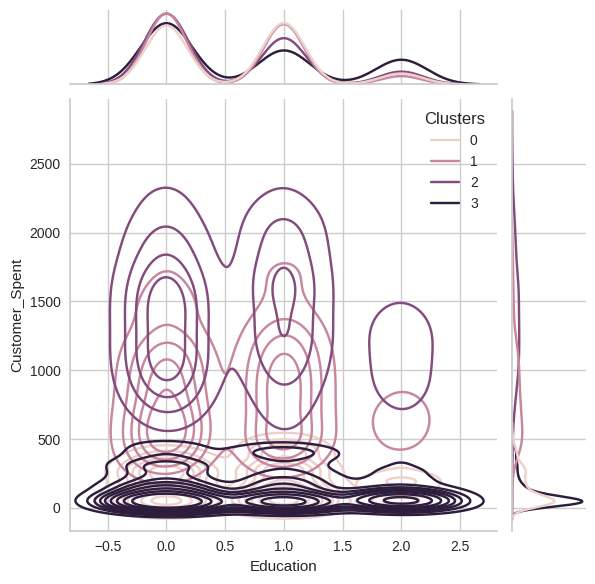

<Figure size 800x550 with 0 Axes>

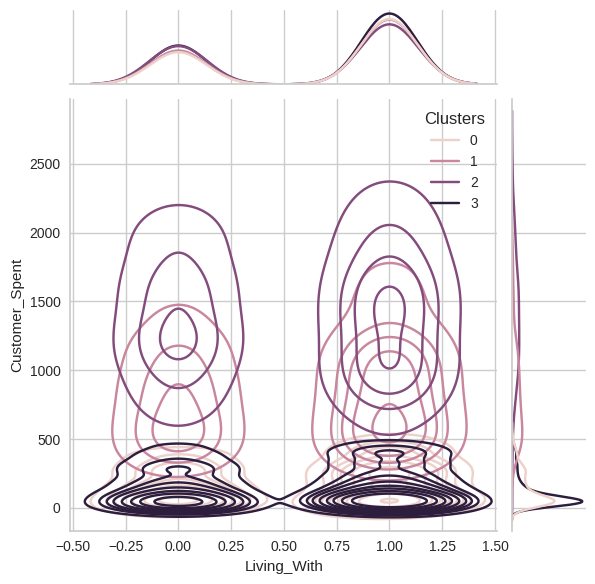

In [76]:
Personal = [ "Kidhome","Teenhome","Years_Since_Registration", "Customer_Age", "Minor_Home", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Customer_Spent"], hue =df["Clusters"], kind="kde")
    plt.show()


based on your clustering and targeting results, we can positioning a strategy like this:

Cluster 0 (high spending & average income): "Luxury for less".

Cluster 1 (high spending & high income): "Ultimate luxury".

Cluster 2 (low spending & low income): "Affordable products".

Cluster 3 (high spending & low income): "Affordable luxury"


# ***7) Model Buildings***


# ***There Are 3 Types of models***

  ***1.Overfitted***  --> If training accuracy is very high and testing accuracy is very low (more than 3% of difference) it is overfitted model

  ***2.Underfitted***  -->model is not able to perform good in training as well as testing it is an underfitted model

  ***3.Generalized*** -->both training accuracy and testing accuracy is high (less than 3 difference between training and testing accuracy)

In [77]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


In [78]:
df

,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,Years_Since_Registration,Customer_Age,Customer_Spent,Total_purcheses,Minor_Home,Total_Accept_cmp,Living_With,Clusters
0,5524,0,58138.0,0,0,58,635,88,546,172,...,4,7,11,66,1617,25,0,0,0,2
1,2174,0,46344.0,1,1,38,11,1,6,2,...,2,5,9,69,27,6,2,0,0,0
2,4141,0,71613.0,0,0,26,426,49,127,111,...,10,4,10,58,776,21,0,0,1,2
3,6182,0,26646.0,1,0,26,11,4,20,10,...,4,6,9,39,53,8,1,0,1,3
4,5324,1,58293.0,1,0,94,173,43,118,46,...,6,5,9,42,422,19,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,0,61223.0,0,1,46,709,43,182,42,...,4,5,10,56,1341,18,1,0,1,1
2236,4001,1,64014.0,2,1,56,406,0,30,0,...,5,7,9,77,444,22,3,1,1,0
2237,7270,0,56981.0,0,0,91,908,48,217,32,...,13,6,9,42,1241,19,0,1,0,2
2238,8235,1,69245.0,0,1,8,428,30,214,80,...,10,3,9,67,843,23,1,0,1,1


In [79]:
x = df.iloc[:,:-1]
y = df["Clusters"]


# ***7.1) Decision Tree***

# ***7.1.1) Decision Tree Using train_test_split(model validation technique)***

In [80]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.80,random_state=42)

In [81]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred
print("train auuracy : ",dt.score(xtrain,ytrain))
print(" test accuracy : ",dt.score(xtest,ytest))

train auuracy :  1.0
 test accuracy :  0.9192090395480226


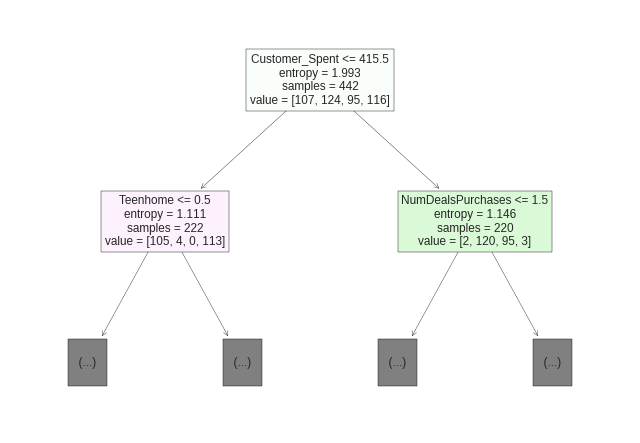

In [82]:
from sklearn import tree
tree.plot_tree(dt, feature_names=x.columns,max_depth=1,filled=True)
plt.show()


Customer_spent is our root node highest infomation gain value this column is most important for model building



## We are getteing overfitted result as there is large difference between training accuracy and testing accuracy

# ***7.1.2) Decision Tree Using KFold(model validation technique)***

In [83]:
kf = KFold(n_splits=5)
kf_scores = cross_val_score(DecisionTreeClassifier(),x,y,cv=kf)

In [84]:
kf_scores

array([0.94808126, 0.89390519, 0.92081448, 0.92533937, 0.91628959])

In [85]:
kf_scores.mean()

0.9208859789791937

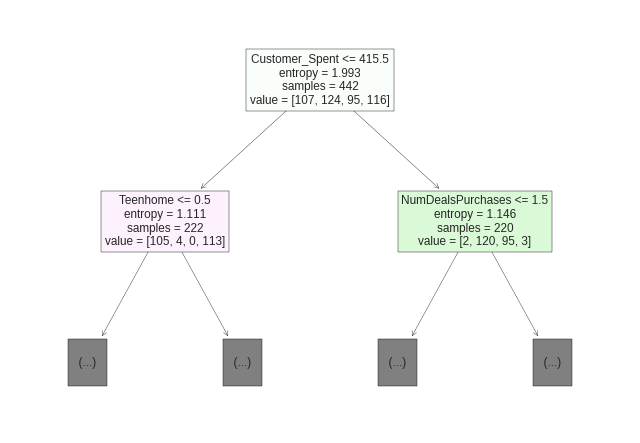

In [86]:
tree.plot_tree(dt, feature_names=x.columns,max_depth=1,filled=True)
plt.show()

Overfitted model as there is large difference between training accuracy and testing accuracy

# ***7.2) Ensemble Technique***

# ***1. Bagging***

# ***2. Boosting***

# ***3.Stacking***

# ***7.2.1) Bagging(DecisionTreeClassifier)***

In [87]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier, VotingClassifier

In [88]:
df

,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,Years_Since_Registration,Customer_Age,Customer_Spent,Total_purcheses,Minor_Home,Total_Accept_cmp,Living_With,Clusters
0,5524,0,58138.0,0,0,58,635,88,546,172,...,4,7,11,66,1617,25,0,0,0,2
1,2174,0,46344.0,1,1,38,11,1,6,2,...,2,5,9,69,27,6,2,0,0,0
2,4141,0,71613.0,0,0,26,426,49,127,111,...,10,4,10,58,776,21,0,0,1,2
3,6182,0,26646.0,1,0,26,11,4,20,10,...,4,6,9,39,53,8,1,0,1,3
4,5324,1,58293.0,1,0,94,173,43,118,46,...,6,5,9,42,422,19,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,0,61223.0,0,1,46,709,43,182,42,...,4,5,10,56,1341,18,1,0,1,1
2236,4001,1,64014.0,2,1,56,406,0,30,0,...,5,7,9,77,444,22,3,1,1,0
2237,7270,0,56981.0,0,0,91,908,48,217,32,...,13,6,9,42,1241,19,0,1,0,2
2238,8235,1,69245.0,0,1,8,428,30,214,80,...,10,3,9,67,843,23,1,0,1,1


In [89]:
#Bagging classifier with Decision trees
bg_dt = BaggingClassifier(DecisionTreeClassifier(),n_estimators=30)
bg_dt.fit(xtrain,ytrain)
print(f"Train : {bg_dt.score(xtrain,ytrain)}\nTest : {bg_dt.score(xtest,ytest)}")

Train : 1.0
Test : 0.9344632768361582


# ***Hyperparameter in bagging classifier***

In [90]:
from sklearn.model_selection import GridSearchCV
param = {'n_estimators' : [20,40,50,60,70,80]}

grid = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), param_grid= param, verbose=1)

grid.fit(xtrain,ytrain)
#k fold model validation

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=BaggingClassifier(estimator=DecisionTreeClassifier()),
             param_grid={'n_estimators': [20, 40, 50, 60, 70, 80]}, verbose=1)

In [91]:
grid.best_params_


{'n_estimators': 40}

# ***Final model using bagging***

In [92]:
bg_dt = BaggingClassifier(DecisionTreeClassifier(),n_estimators=70)
bg_dt.fit(xtrain,ytrain)
print(f"Train accuracy : {bg_dt.score(xtrain,ytrain)}\nTest accuracy : {bg_dt.score(xtest,ytest)}")

Train accuracy : 1.0
Test accuracy : 0.9316384180790961


 **Still we are getting overfitted model**

# ***7.2.2) Boosting***

# ***Creating user define model***

In [93]:
def prediction(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(f"Train Accuracy: {model.score(xtrain,ytrain)}")
    print(f"Test Accuracy: {model.score(xtest,ytest)}")
    print(classification_report(ytest,ypred))


# ***AdaBoostClassifier***

In [94]:
prediction(AdaBoostClassifier())

Train Accuracy: 0.581447963800905
Test Accuracy: 0.5632768361581921
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       423
           1       0.54      0.82      0.66       415
           2       0.80      0.40      0.54       455
           3       0.52      0.99      0.68       477

    accuracy                           0.56      1770
   macro avg       0.47      0.55      0.47      1770
weighted avg       0.47      0.56      0.47      1770



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Underfitted model as traing and testing accuracy is very low**

# ***GradientBoostingClassifier()***

In [95]:
prediction(GradientBoostingClassifier())


Train Accuracy: 1.0
Test Accuracy: 0.9412429378531073
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       423
           1       0.87      0.94      0.90       415
           2       0.98      0.91      0.94       455
           3       0.96      0.98      0.97       477

    accuracy                           0.94      1770
   macro avg       0.94      0.94      0.94      1770
weighted avg       0.94      0.94      0.94      1770



 **overfitted model**

# ***Tuning in boosting***

In [96]:
params = {
    'n_estimators' : [90,110,150],
    'learning_rate' : [0.5,0.6,0.7,0.9,1],
    'max_depth' : [3,5,7,11]
    }


In [97]:
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=params, verbose=1)

grid.fit(xtrain,ytrain)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.5, 0.6, 0.7, 0.9, 1],
                         'max_depth': [3, 5, 7, 11],
                         'n_estimators': [90, 110, 150]},
             verbose=1)

In [98]:
grid.best_params_


{'learning_rate': 0.9, 'max_depth': 3, 'n_estimators': 150}

In [99]:
prediction(GradientBoostingClassifier(n_estimators=110, learning_rate=1, max_depth=3))


Train Accuracy: 1.0
Test Accuracy: 0.9389830508474576
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       423
           1       0.88      0.93      0.90       415
           2       0.98      0.91      0.94       455
           3       0.96      0.97      0.97       477

    accuracy                           0.94      1770
   macro avg       0.94      0.94      0.94      1770
weighted avg       0.94      0.94      0.94      1770



overfitted

# ***XGBClassifier***

In [100]:
from xgboost import XGBClassifier
prediction(XGBClassifier())
#overfitted result

Train Accuracy: 1.0
Test Accuracy: 0.9514124293785311
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       423
           1       0.90      0.95      0.92       415
           2       0.98      0.93      0.95       455
           3       0.97      0.98      0.97       477

    accuracy                           0.95      1770
   macro avg       0.95      0.95      0.95      1770
weighted avg       0.95      0.95      0.95      1770



# ***7.3) Logestic Regression***

In [101]:
from sklearn.linear_model import LogisticRegression
prediction(LogisticRegression()) #underfitted model as training accuracy and testing accuracy is very low

Train Accuracy: 0.6719457013574661
Test Accuracy: 0.6745762711864407
              precision    recall  f1-score   support

           0       0.55      0.68      0.61       423
           1       0.71      0.75      0.73       415
           2       0.81      0.79      0.80       455
           3       0.64      0.50      0.56       477

    accuracy                           0.67      1770
   macro avg       0.68      0.68      0.67      1770
weighted avg       0.68      0.67      0.67      1770



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# ***7.4) KNeighborsClassifier***

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
prediction(KNeighborsClassifier()) #underfitted model as training accuracy and testing accuracy is very low

Train Accuracy: 0.7126696832579186
Test Accuracy: 0.6429378531073446
              precision    recall  f1-score   support

           0       0.49      0.52      0.50       423
           1       0.53      0.59      0.56       415
           2       0.81      0.74      0.78       455
           3       0.75      0.70      0.73       477

    accuracy                           0.64      1770
   macro avg       0.65      0.64      0.64      1770
weighted avg       0.65      0.64      0.65      1770



# ***Bagging in KNeighborsClassifier***

In [104]:
bg_dt = BaggingClassifier(KNeighborsClassifier())
bg_dt.fit(xtrain,ytrain)
print(f"Train accuracy : {bg_dt.score(xtrain,ytrain)}\nTest accuracy : {bg_dt.score(xtest,ytest)}") #underfitted model as training accuracy and testing accuracy is very low

Train accuracy : 0.7307692307692307
Test accuracy : 0.6401129943502825


# ***7.5) Random Forest***

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, classification_report


In [106]:
 prediction(RandomForestClassifier(max_depth=4)) #generalized model  good model

Train Accuracy: 0.9570135746606335
Test Accuracy: 0.9322033898305084
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       423
           1       0.82      0.97      0.89       415
           2       0.99      0.88      0.93       455
           3       0.97      0.96      0.97       477

    accuracy                           0.93      1770
   macro avg       0.94      0.93      0.93      1770
weighted avg       0.94      0.93      0.93      1770



# ***7.6) SVM***

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [108]:
prediction(SVC()) #underfitted model as training acccuracy and testing accuracy is very low

Train Accuracy: 0.6493212669683258
Test Accuracy: 0.6638418079096046
              precision    recall  f1-score   support

           0       0.51      0.46      0.49       423
           1       0.56      0.68      0.61       415
           2       0.83      0.76      0.80       455
           3       0.75      0.74      0.74       477

    accuracy                           0.66      1770
   macro avg       0.66      0.66      0.66      1770
weighted avg       0.67      0.66      0.66      1770



# ***8) Model Evaluation***

# ***Random forest is a best performing algorithum so we will use random forest algorithum***

# ***Final model***

In [109]:
rf = RandomForestClassifier(max_depth=4)
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
ypred
print(f"training accuracy : {rf.score(xtrain,ytrain)}\ntesting accuracy :{rf.score(xtest,ytest)}")
print(classification_report(ytest,ypred))

#Generalized model

training accuracy : 0.9524886877828054
testing accuracy :0.9327683615819209
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       423
           1       0.83      0.96      0.89       415
           2       0.98      0.89      0.93       455
           3       0.97      0.97      0.97       477

    accuracy                           0.93      1770
   macro avg       0.94      0.93      0.93      1770
weighted avg       0.94      0.93      0.93      1770



# ***9) Pipeline creation***

In [110]:
from sklearn.pipeline import Pipeline, make_pipeline
import pandas as pd
from sklearn.model_selection import train_test_split

In [111]:
from sklearn import set_config

set_config(display='diagram')

In [112]:
model = Pipeline([('scaler',StandardScaler()),('rf',RandomForestClassifier())])
model

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

In [113]:
x = df.loc[:, ['Income','Recency','Customer_Age','Total_purcheses']]
y=  df.Clusters

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state =42)

In [114]:
model.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

In [115]:
import pickle

pickle.dump(model, open('model.pkl','wb'))